In [4]:
import pandas as pd
from src.core.Processing import Processing
from src.core.Analyser import Analyser
from matplotlib import pyplot as plt
import numpy as np
from pathlib import Path
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
file_path=Path().cwd().parent / 'data' / 'german.csv'
sep=","
outcome="Class"
positive_mod="1"
file_path

PosixPath('/home/kgamegah/Documents/academic/UPC/SupervisedLearning/projets/fraud_credit_detection/data/german.csv')

In [19]:
col_names = ["Statut_du_compte_courant_existant", 
             "Duree_en_mois", "Historique_de_credit", 
             "Objectif","Montant_du_credit", "Compte_d_epargne", 
             "Emploi_actuel_depuis", "Taux_de_versement_en_pourcentage_du_revenu_disponible", "Statut_personnel_et_sexe", 
             "Autres_debiteurs", "Residence_actuelle_depuis", 
             "Propriete", "Age_en_annees", "Autres_plans_de_versement", 
             "Logement", "Nombre_de_credits_existants_dans_cette_banque", 
             "Travail", "Nombre_de_personnes_a_charge", "Telephone", 
             "Travailleur_etranger",
             outcome]

df=pd.read_csv(file_path,
               sep=sep, 
               names=col_names)
df.head()

,Statut_du_compte_courant_existant,Duree_en_mois,Historique_de_credit,Objectif,Montant_du_credit,Compte_d_epargne,Emploi_actuel_depuis,Taux_de_versement_en_pourcentage_du_revenu_disponible,Statut_personnel_et_sexe,Autres_debiteurs,...,Propriete,Age_en_annees,Autres_plans_de_versement,Logement,Nombre_de_credits_existants_dans_cette_banque,Travail,Nombre_de_personnes_a_charge,Telephone,Travailleur_etranger,Class
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [20]:
process=Processing() # object for df processing
analyzer=Analyser() #object which give graphics, statistics indicators for df

In [21]:
df.shape

(1000, 21)

In [22]:
process.summary(df)

{'Missing Values': Statut_du_compte_courant_existant                        0
 Duree_en_mois                                            0
 Historique_de_credit                                     0
 Objectif                                                 0
 Montant_du_credit                                        0
 Compte_d_epargne                                         0
 Emploi_actuel_depuis                                     0
 Taux_de_versement_en_pourcentage_du_revenu_disponible    0
 Statut_personnel_et_sexe                                 0
 Autres_debiteurs                                         0
 Residence_actuelle_depuis                                0
 Propriete                                                0
 Age_en_annees                                            0
 Autres_plans_de_versement                                0
 Logement                                                 0
 Nombre_de_credits_existants_dans_cette_banque            0
 Travail              

In [23]:
df[outcome]= df[outcome].astype(str) # cast outcome to qualitative variable

the dimension of df is (1000,21)
We can see that they don't have any missing values and constant features

Class
1    0.7
2    0.3
Name: count, dtype: float64

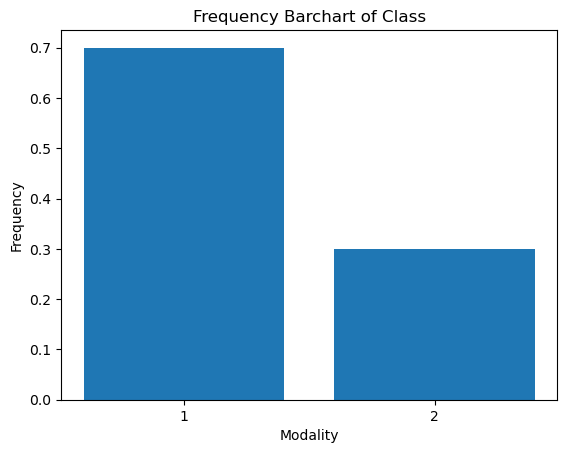

In [24]:
fig, ax = plt.subplots()
analyzer.bar_chart(df, outcome, ax, with_proportion=True)

We can see above that, Class attribute is very imbalanced ( 0.7 for modality "1")

In [25]:
analyzer_summary = analyzer.summary(df)
quantitatives, qualitatives = analyzer_summary["features"]["quantitative_columns"],analyzer_summary["features"]["qualitative_columns"]

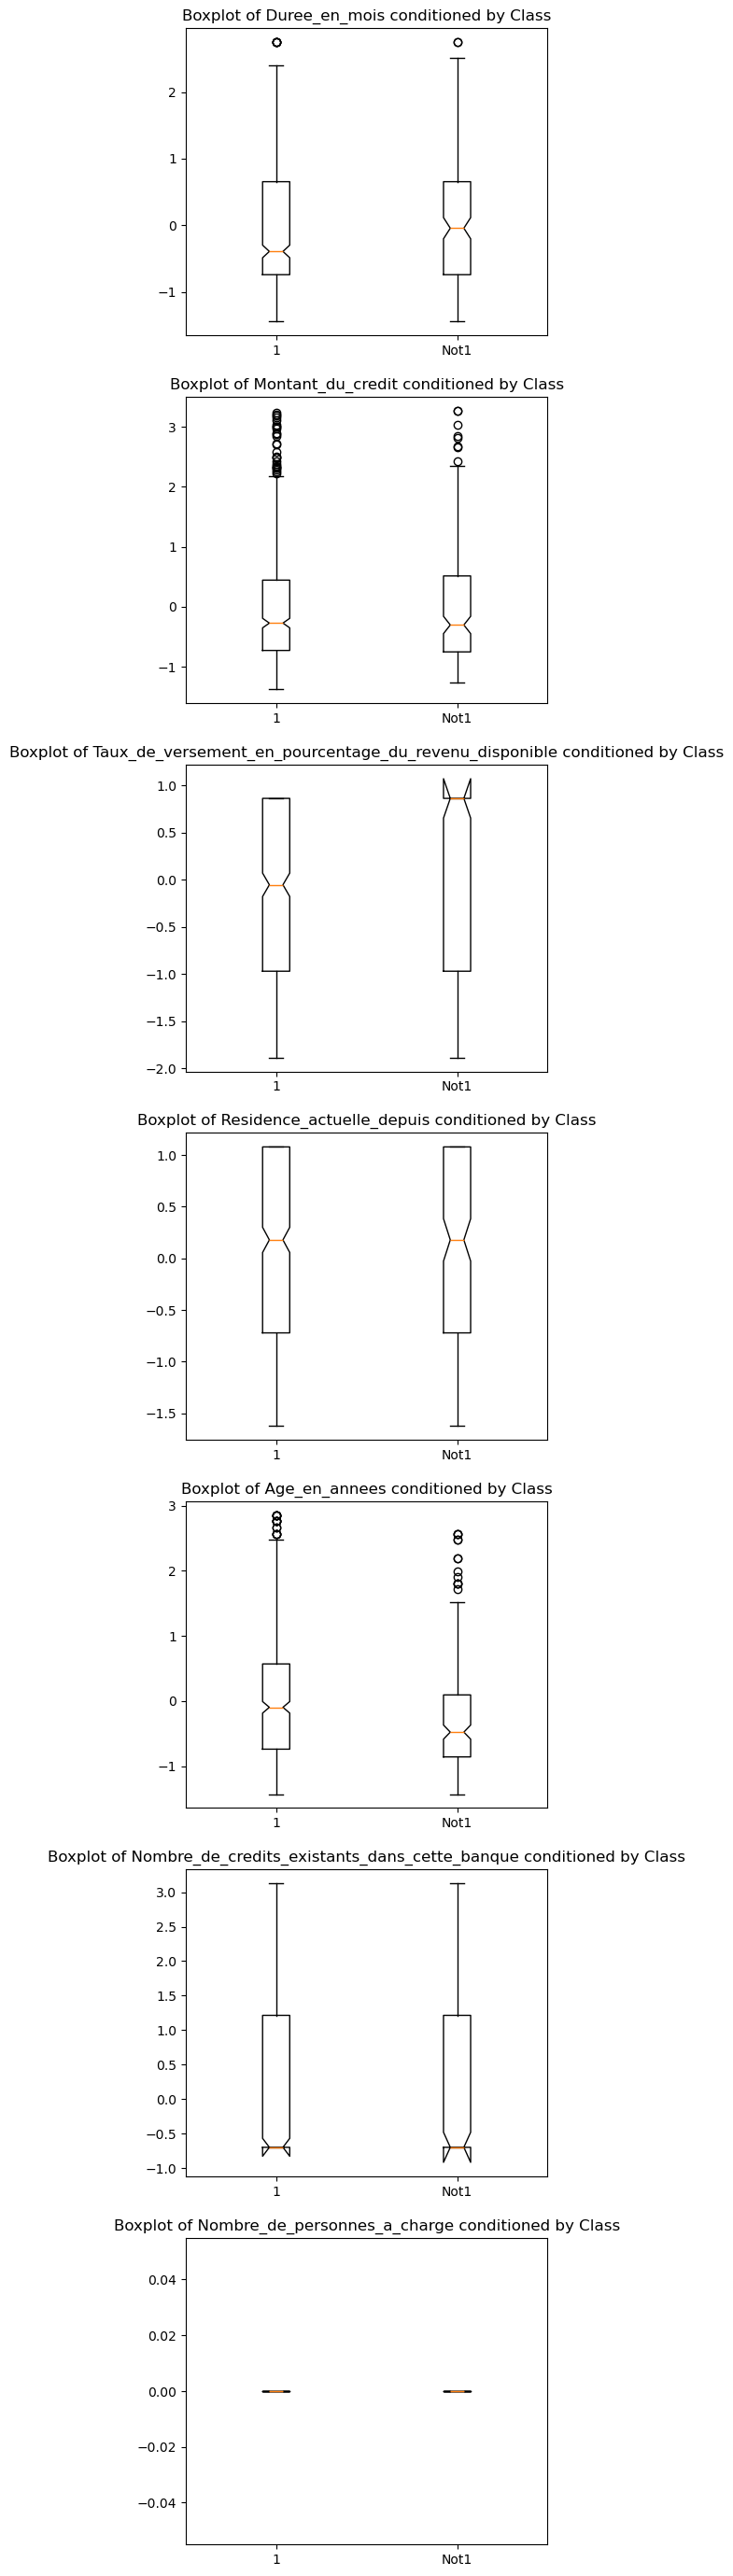

In [26]:
# we decided to remove outliers before boxplots creation
df = process.remove_outliers(df)
df[quantitatives] = process.standard_scaler(df[quantitatives]) #we also standardize quantitative features
_, axs = plt.subplots(nrows=len(quantitatives), figsize=(5,len(quantitatives)*5))
for i in range(len(quantitatives)):
    analyzer.prop_churn_by_numerical_boxplot(df,outcome,positive_mod,quantitatives[i],axs[i])

- due to important numbers of features, we select variables with low, no influence for Class outcome:
    - Not/low influence: ["Nombre_de_personnes_a_charge","Nombre_de_credits_existants_dans_cette_banque","Residence_actuelle_depuis","Montant_du_credit"]

##### Conclusion -relevant quantitative features:
All except ["Nombre_de_personnes_a_charge","Nombre_de_credits_existants_dans_cette_banque","Residence_actuelle_depuis","Montant_du_credit"], to prevent overfitting risk, we are going to select a sub set of features most influents for Class outcome

In [27]:
relevant_quantitatives_features = list(set(quantitatives).difference({"Nombre_de_personnes_a_charge","Nombre_de_credits_existants_dans_cette_banque","Residence_actuelle_depuis","Montant_du_credit"}))
df_new = df[[outcome] + relevant_quantitatives_features] # we decided to work with only relevant features for credit

df_new.head()

,Class,Duree_en_mois,Age_en_annees,Taux_de_versement_en_pourcentage_du_revenu_disponible
6,1,0.653310,1.807000,-0.054079
7,1,2.049085,0.094238,-0.969647
8,1,-0.742464,2.568227,-0.969647
9,2,1.351198,-0.571835,0.861489
10,2,-0.742464,-0.857296,-0.054079


<Axes: >

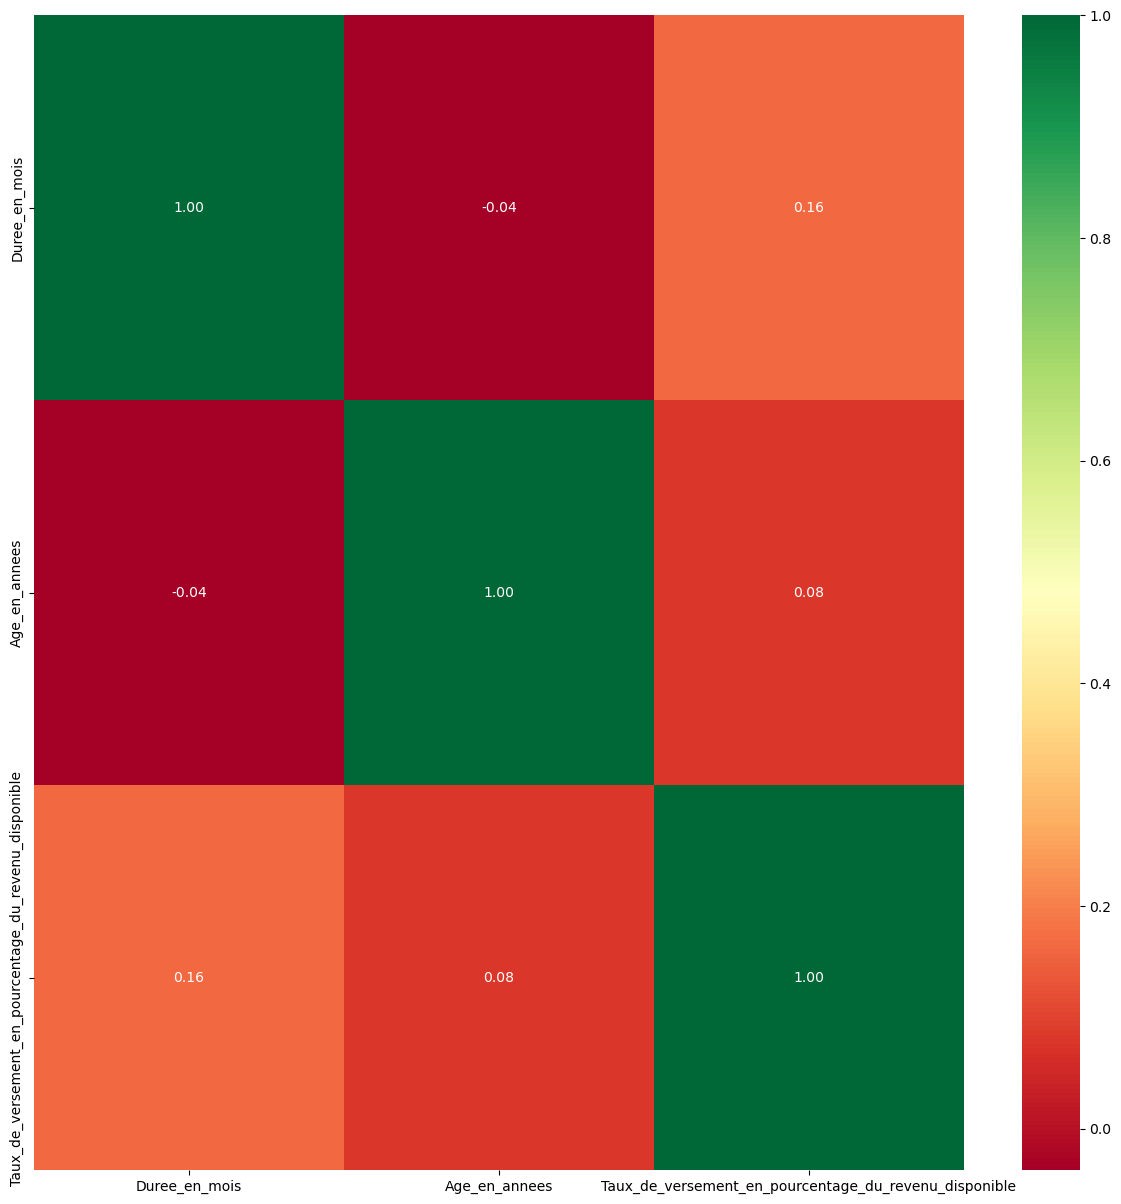

In [28]:
plt.figure(figsize=(15, 15))
analyzer.correlation_heatmap(df_new[[outcome] + relevant_quantitatives_features], annot=True)

In [183]:
# process.summary(df_new_)

In [184]:
# analyzer.summary(df_new_)

In [185]:
###END OF SESSION 1

In [29]:
from src.core.ComputeModel import ComputeModel
from src.core.globals import MODEL_HYPERPARAMETERS_DEF
import copy

positive_mod="1"
models={"Logistic Regression":None,
        "SVM":None,
        "DecisionTreeClassifier":None
        }

### MAKE A COPY OF DATAFRAME

In [30]:
relevant_quantitatives_qualitatives_features = relevant_quantitatives_features + qualitatives[:-1]
df_new_ = df[[outcome] + relevant_quantitatives_qualitatives_features]
df_new_.head()

,Class,Duree_en_mois,Age_en_annees,Taux_de_versement_en_pourcentage_du_revenu_disponible,Statut_du_compte_courant_existant,Historique_de_credit,Objectif,Compte_d_epargne,Emploi_actuel_depuis,Statut_personnel_et_sexe,Autres_debiteurs,Propriete,Autres_plans_de_versement,Logement,Travail,Telephone,Travailleur_etranger
6,1,0.653310,1.807000,-0.054079,A14,A32,A42,A63,A75,A93,A101,A122,A143,A152,A173,A191,A201
7,1,2.049085,0.094238,-0.969647,A12,A32,A41,A61,A73,A93,A101,A123,A143,A151,A174,A192,A201
8,1,-0.742464,2.568227,-0.969647,A14,A32,A43,A64,A74,A91,A101,A121,A143,A152,A172,A191,A201
9,2,1.351198,-0.571835,0.861489,A12,A34,A40,A61,A71,A94,A101,A123,A143,A152,A174,A191,A201
10,2,-0.742464,-0.857296,-0.054079,A12,A32,A40,A61,A72,A92,A101,A123,A143,A151,A173,A191,A201


In [31]:
# we use liblinear solver because Gradient descent doesn't converge for Logistic Regression
for model_name in models.keys():
    if model_name == "Logistic Regression":
        hyperparameters = copy.deepcopy(MODEL_HYPERPARAMETERS_DEF[model_name])
        hyperparameters["solver"]="liblinear"
    else:
        hyperparameters=None
        
    models[model_name]=ComputeModel(df_X=df_new_[relevant_quantitatives_qualitatives_features], 
                                    y=df_new_[outcome],
                                    process=process, 
                                    model_name=model_name,
                                    hyperparameters=hyperparameters,
                                    positive_mod=positive_mod,
                                    stratify=False)
    models[model_name].fit()

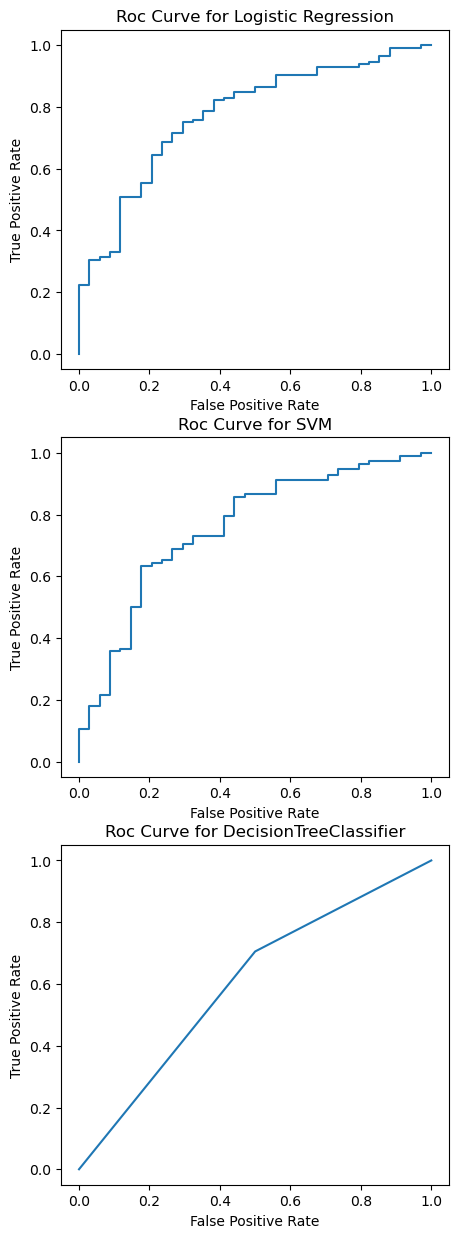

In [32]:
fig, axs = plt.subplots(nrows=len(models.keys()), figsize=(5,5*len(models.keys())))
metrics_default={list(models.keys())[i]:models[list(models.keys())[i]].metrics(plot_roc=True,ax=axs[i]) for i in range(len(models.keys()))}

In [33]:
metrics_default

{'Logistic Regression': {'auc': 0.7736344537815126,
  'accuracy': 0.7876712328767124,
  'precision': 0.8403361344537815,
  'recall': 0.8928571428571429,
  'f1_score': 0.8658008658008658},
 'SVM': {'auc': 0.756827731092437,
  'accuracy': 0.8013698630136986,
  'precision': 0.8429752066115702,
  'recall': 0.9107142857142857,
  'f1_score': 0.8755364806866952},
 'DecisionTreeClassifier': {'auc': 0.6026785714285714,
  'accuracy': 0.6575342465753424,
  'precision': 0.8229166666666666,
  'recall': 0.7053571428571429,
  'f1_score': 0.7596153846153847}}

In conclusion:
we set up three models, DecisionTreeClassifier, SVM, Logistic Regression:
we use AUC metrics because it's metrics that allow to see False positive Rate and True Positive Rate, and as dataset is imbalanced, accuracy in this case is not relevant
- We can see that  Logistic Regression is the best model because AUC of this model (~0.77) is significantly bigger than auc for 2 others models
- We can see that probabity to be positive is very very low, consequently recall and precision are equal to 0 because dataset is very very imbalanced (~70% negative ~30% positive)
- To conclude, models are not efficient for this dataset, we need to have a oversampling/undersampling methods to balanced majority and minority class for Class outcome, we have decided to actualy work with imbalanced dataset in this sequence because in sequence 4, we will see over/under sampling methods
- Simplify conclusion: Logistic Regression > SVM > DecisionTreeClassifier (with default hyperparameters)




In [35]:
params_grid= \
    {
        "Logistic Regression": \
            {
                "penalty": ["l2"],
                "C": np.logspace(-3, 3, 7),
                "solver": ["lbfgs"],
                "multi_class": ["auto"],
                "n_jobs": [None],
                "max_iter": [300, 350]
            },
        "SVM":
            {
                "kernel": ["poly", "rbf", "sigmoid"],
                "C": [0.1, 1, 10, 100],
                "degree": [3],
                "gamma": [1, 0.1, 0.01, 0.001]

            },
        "DecisionTreeClassifier":
            {
                "criterion": ["gini"],
                "splitter": ["best"],
                "max_depth": [None],
                "min_samples_split": [2, 3, 4],
                "min_samples_leaf": [1],
                "min_weight_fraction_leaf": [0.],
                "max_features": [None],
                "random_state": [None],
                "max_leaf_nodes": [None]+list(range(2, 100)),
                "min_impurity_decrease": [0.],
                "class_weight": [None],
                "ccp_alpha": [0.]
            }

    }


In [36]:
# we used 3 fold cross validation with a params default grid located in globals file (in src directory)
for model_name in models.keys():
    models[model_name]=ComputeModel(df_X=df_new_[relevant_quantitatives_qualitatives_features],
                                    y=df_new_[outcome],
                                    process=process,
                                    model_name=model_name,
                                    positive_mod=positive_mod,
                                    grid_search=True,
                                    cv=3,
                                    params_grid=params_grid[model_name],
                                    stratify=False)
    models[model_name].fit()

Fitting 3 folds for each of 14 candidates, totalling 42 fits
Fitting 3 folds for each of 48 candidates, totalling 144 fits
Fitting 3 folds for each of 297 candidates, totalling 891 fits


{'Logistic Regression': {'auc': 0.7652310924369747,
  'accuracy': 0.7876712328767124,
  'precision': 0.8403361344537815,
  'recall': 0.8928571428571429,
  'f1_score': 0.8658008658008658},
 'SVM': {'auc': 0.7547268907563026,
  'accuracy': 0.7876712328767124,
  'precision': 0.824,
  'recall': 0.9196428571428571,
  'f1_score': 0.8691983122362869},
 'DecisionTreeClassifier': {'auc': 0.695640756302521,
  'accuracy': 0.7671232876712328,
  'precision': 0.7671232876712328,
  'recall': 1.0,
  'f1_score': 0.8682170542635659}}

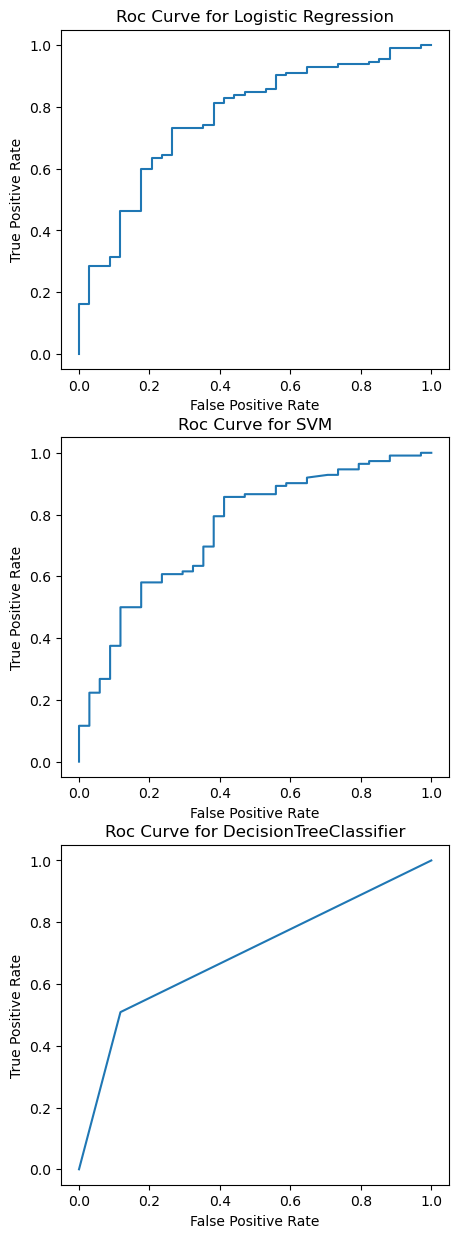

In [37]:
fig, axs = plt.subplots(nrows=len(models.keys()),figsize=(5,5*len(models.keys())))
metrics={list(models.keys())[i]: models[list(models.keys())[i]].metrics(plot_roc=True,ax=axs[i]) 
         for i in range(len(models.keys()))}
metrics

In [38]:
resume_tuned = pd.DataFrame(metrics)
resume_default = pd.DataFrame(metrics_default)

In [39]:
pd.concat([resume_tuned.T,resume_default.T])\
    .reset_index()\
    .groupby("index")\
    .agg(lambda x:[a for a in x])
#first component of tuple is metric for hyperparameters tuning

,auc,accuracy,precision,recall,f1_score
index,,,,,
DecisionTreeClassifier,"[0.695640756302521, 0.6026785714285714]","[0.7671232876712328, 0.6575342465753424]","[0.7671232876712328, 0.8229166666666666]","[1.0, 0.7053571428571429]","[0.8682170542635659, 0.7596153846153847]"
Logistic Regression,"[0.7652310924369747, 0.7736344537815126]","[0.7876712328767124, 0.7876712328767124]","[0.8403361344537815, 0.8403361344537815]","[0.8928571428571429, 0.8928571428571429]","[0.8658008658008658, 0.8658008658008658]"
SVM,"[0.7547268907563026, 0.756827731092437]","[0.7876712328767124, 0.8013698630136986]","[0.824, 0.8429752066115702]","[0.9196428571428571, 0.9107142857142857]","[0.8691983122362869, 0.8755364806866952]"


- We can see that DTC are significantly decrease in term of performance (auc: 0.69 to 0.60).    
    SVM stay relatively at the same order of values.
  But with tuning, LogisticRegression, auc increase, accuracy stay constant (.78), precision, recall, f1_score stay equal to 0.84
- An important things: metrics after tuning are more reliable because a 3 fold cross validation are set up during training whereas with default hyperparameters this 3 cross validation was not done (1 test set and 1 training set), that's why some indicators don't increase or decrease after tuning.
- Conclusion: even if you are using grid search, the best model for each three type of model don't resolve the problem of imbalance dataset;
  We need to equilibrate dataset and after train a model, I think that they are a huge imbalance between majority and minority modality for Class outcome
  and consequently all 3 models don't see minority class and predict always majority class. 
  
  **Logistic Regression with 3 cross validation (auc(0.76) --> auc(0.77)) seems be the best of all models trained.**

In [40]:
hyperparameters_tuned = {list(models.keys())[i]:models[list(models.keys())[i]].model.hyperparameters for i in range(len(models.keys()))}

In [41]:
hyperparameters_tuned

{'Logistic Regression': {'C': 1.0,
  'max_iter': 300,
  'multi_class': 'auto',
  'n_jobs': None,
  'penalty': 'l2',
  'solver': 'lbfgs'},
 'SVM': {'C': 100, 'degree': 3, 'gamma': 0.001, 'kernel': 'rbf'},
 'DecisionTreeClassifier': {'ccp_alpha': 0.0,
  'class_weight': None,
  'criterion': 'gini',
  'max_depth': None,
  'max_features': None,
  'max_leaf_nodes': 2,
  'min_impurity_decrease': 0.0,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'min_weight_fraction_leaf': 0.0,
  'random_state': None,
  'splitter': 'best'}}

In [42]:
best_model, hyperparameters_best = models["Logistic Regression"], hyperparameters_tuned["Logistic Regression"]

In [199]:
###END OF SESSION 2

In [43]:
model_gradient = ComputeModel(df_X=df_new_[relevant_quantitatives_qualitatives_features],
                              y=df_new_[outcome],
                              process=process,
                              model_name="GradientBoostingClassifier",
                              positive_mod=positive_mod,
                              grid_search=True,
                              cv=3)
model_gradient.fit()

Fitting 3 folds for each of 48 candidates, totalling 144 fits


In [44]:
model_gradient.metrics() # gradiant boosting (~0.73) is not better than SVM (~0.75)

{'auc': 0.7355019493177387,
 'accuracy': 0.7397260273972602,
 'precision': 0.7397260273972602,
 'recall': 1.0,
 'f1_score': 0.8503937007874016}

In [45]:
model_random=ComputeModel(df_new_[relevant_quantitatives_qualitatives_features],
                          df_new_[outcome],
                          process=process,
                          model_name="RandomForestClassifier",
                          positive_mod=positive_mod,
                          grid_search=True)
model_random.fit()

Fitting 3 folds for each of 25 candidates, totalling 75 fits


In [46]:
model_random.metrics() # Random forest (~0.77) is better than SVM (auc ~0.75)

{'auc': 0.7760721247563354,
 'accuracy': 0.7671232876712328,
 'precision': 0.7983870967741935,
 'recall': 0.9166666666666666,
 'f1_score': 0.8534482758620691}

We can see that two model don't resolve problem of imbalanced dataset, but auc is better for RandomForestClassifier
than for GradientBoostingClassifier with cross validation in objective of reducing variance of the model.

In [47]:
from matplotlib import pyplot
hyperparameters_best = model_random.model.hyperparameters

In [48]:
best_model = model_random.model.model

In [49]:
hyperparameters_best

{'max_depth': 19, 'n_estimators': 347}

In [50]:
best_model

RandomForestClassifier(max_depth=19, n_estimators=347)

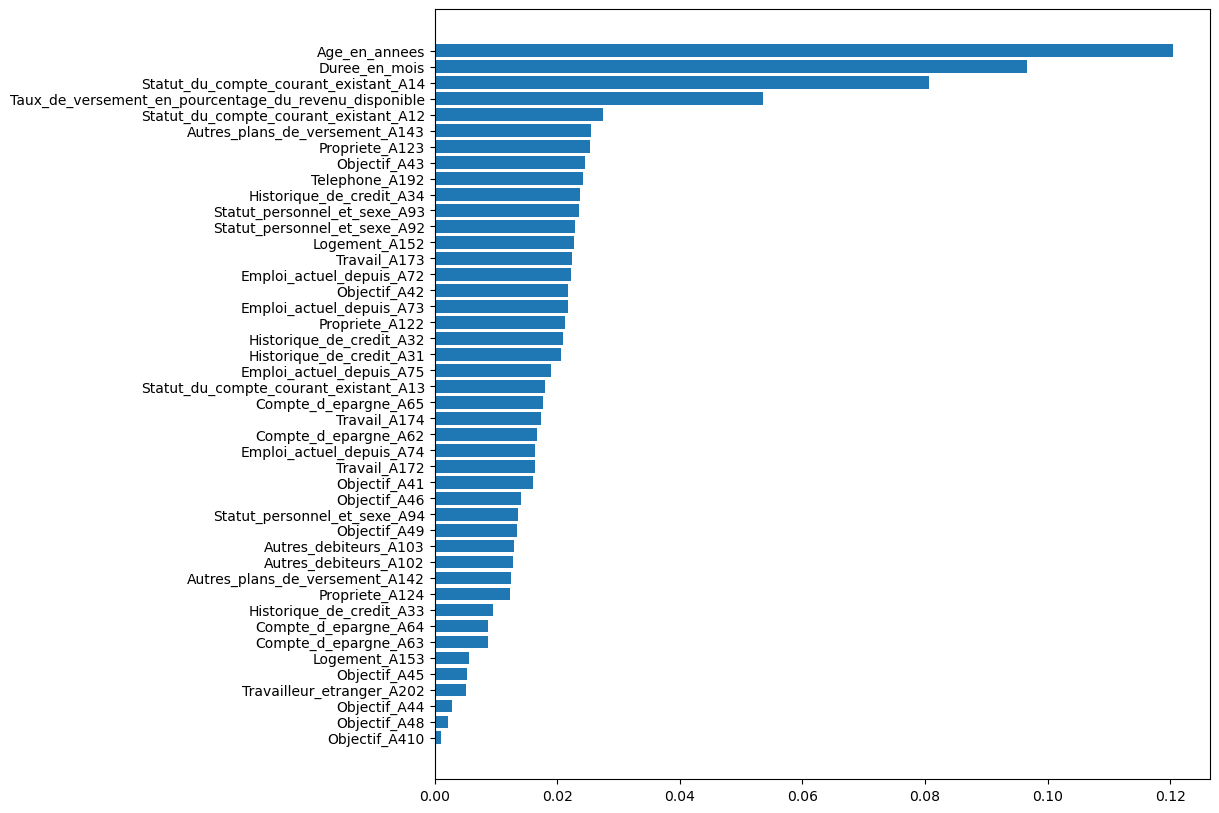

In [52]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

fig, ax = plt.subplots(figsize=(10,10))
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(model_random.dict_split["columns_features"])[indices])

top 5 influent features : 
- "Age_en_annee", 
- "Duree_en_mois", 
- "Statut_du_compte_courant_existant_A14", 
- "Taux_de_versement"
- "Statut_du_compte_courant

In [53]:
model_seq3 = best_model

In [54]:
hyperparameters_best

{'max_depth': 19, 'n_estimators': 347}

In [55]:
model_seq3

RandomForestClassifier(max_depth=19, n_estimators=347)

In [56]:
###END OF SESSION 3

In [57]:
models={"Logistic Regression":None,
        #"SVM":None, # training for SVM take a long time
        "DecisionTreeClassifier":None,
        "RandomForestClassifier": None,
        "GradientBoostingClassifier":None
        }

In [60]:
# df_new_[[e for e in relevant_quantitatives_qualitatives_features if e in quantitatives]] = \
#    process.standard_scaler(df_new_[[e for e in relevant_quantitatives_qualitatives_features if e in quantitatives]])

df_new_.loc[:, [e for e in relevant_quantitatives_qualitatives_features if e in quantitatives]] = \
    process.standard_scaler(df_new_[[e for e in relevant_quantitatives_qualitatives_features if e in quantitatives]])

In [62]:
df_new_.head()

,Class,Duree_en_mois,Age_en_annees,Taux_de_versement_en_pourcentage_du_revenu_disponible,Statut_du_compte_courant_existant,Historique_de_credit,Objectif,Compte_d_epargne,Emploi_actuel_depuis,Statut_personnel_et_sexe,Autres_debiteurs,Propriete,Autres_plans_de_versement,Logement,Travail,Telephone,Travailleur_etranger
6,1,0.653310,1.807000,-0.054079,A14,A32,A42,A63,A75,A93,A101,A122,A143,A152,A173,A191,A201
7,1,2.049085,0.094238,-0.969647,A12,A32,A41,A61,A73,A93,A101,A123,A143,A151,A174,A192,A201
8,1,-0.742464,2.568227,-0.969647,A14,A32,A43,A64,A74,A91,A101,A121,A143,A152,A172,A191,A201
9,2,1.351198,-0.571835,0.861489,A12,A34,A40,A61,A71,A94,A101,A123,A143,A152,A174,A191,A201
10,2,-0.742464,-0.857296,-0.054079,A12,A32,A40,A61,A72,A92,A101,A123,A143,A151,A173,A191,A201


In [67]:
import copy
# we use liblinear solver because Gradient descent don't converge for Logistic Regression
for model_name in models.keys():
    if model_name == "Logistic Regression":
        hyperparameters=copy.deepcopy(MODEL_HYPERPARAMETERS_DEF[model_name])
        hyperparameters["solver"]="liblinear"
    else:
        hyperparameters=None
    models[model_name] = ComputeModel(
        df_X=df_new_[relevant_quantitatives_qualitatives_features], 
        y=df_new_[outcome],
        process=process,model_name=model_name,
        hyperparameters=hyperparameters,positive_mod=positive_mod
    )
    models[model_name].fit()

{'Logistic Regression': {'auc': 0.77046783625731,
  'accuracy': 0.7465753424657534,
  'precision': 0.8141592920353983,
  'recall': 0.8518518518518519,
  'f1_score': 0.832579185520362},
 'DecisionTreeClassifier': {'auc': 0.5823586744639376,
  'accuracy': 0.684931506849315,
  'precision': 0.7818181818181819,
  'recall': 0.7962962962962963,
  'f1_score': 0.7889908256880734},
 'RandomForestClassifier': {'auc': 0.7681530214424952,
  'accuracy': 0.7808219178082192,
  'precision': 0.8064516129032258,
  'recall': 0.9259259259259259,
  'f1_score': 0.8620689655172414},
 'GradientBoostingClassifier': {'auc': 0.7646198830409356,
  'accuracy': 0.7602739726027398,
  'precision': 0.8173913043478261,
  'recall': 0.8703703703703703,
  'f1_score': 0.8430493273542601}}

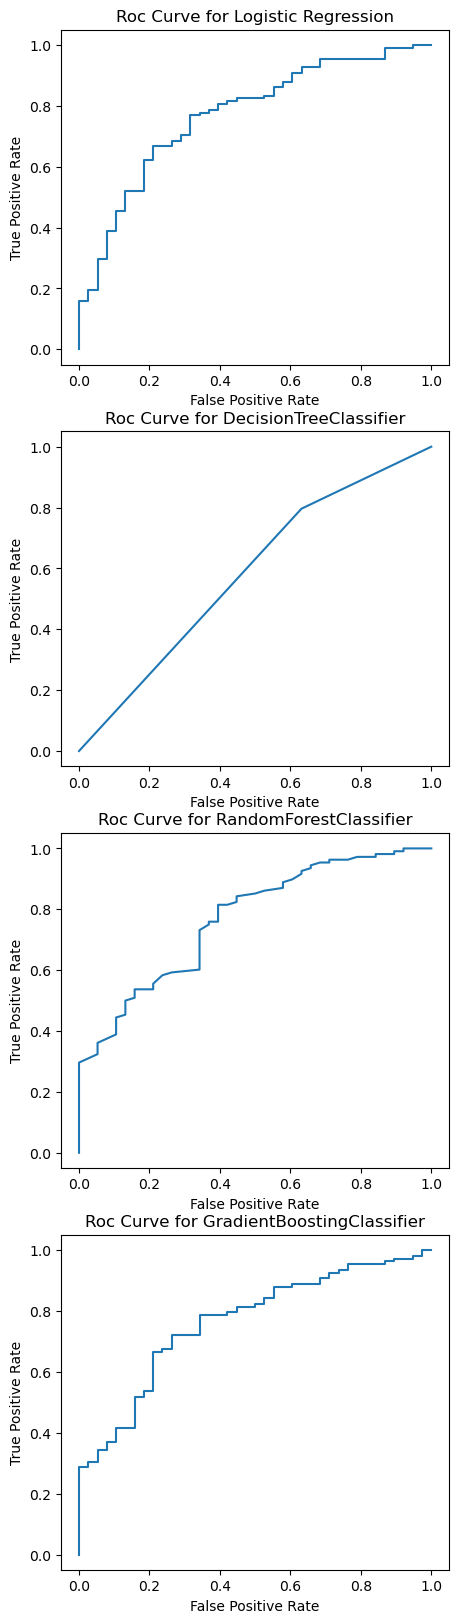

In [68]:
fig,axs=plt.subplots(nrows=len(models.keys()),figsize=(5,5*len(models.keys())))
metrics_default={list(models.keys())[i]:models[list(models.keys())[i]].metrics(plot_roc=True,ax=axs[i]) for i in range(len(models.keys()))}
metrics_default

In [69]:
# we use liblinear solver because Gradient descent doesn't converge for Logistic Regression
for model_name in models.keys():
    if model_name == "Logistic Regression":
        hyperparameters=copy.deepcopy(MODEL_HYPERPARAMETERS_DEF[model_name])
        hyperparameters["solver"]="liblinear"
    else:
        hyperparameters=None
    models[model_name]=ComputeModel(
        df_new_[relevant_quantitatives_qualitatives_features],df_new_[outcome],
        process=process,model_name=model_name,
        hyperparameters=hyperparameters,positive_mod=positive_mod
    )
    models[model_name].fit(sampling=True, method="SMOTE")

{'Logistic Regression': {'auc': 0.8424211248285323,
  'accuracy': 0.7592592592592593,
  'precision': 0.7545454545454545,
  'recall': 0.7685185185185185,
  'f1_score': 0.7614678899082569},
 'DecisionTreeClassifier': {'auc': 0.7638888888888888,
  'accuracy': 0.7638888888888888,
  'precision': 0.7663551401869159,
  'recall': 0.7592592592592593,
  'f1_score': 0.7627906976744186},
 'RandomForestClassifier': {'auc': 0.9417438271604939,
  'accuracy': 0.8842592592592593,
  'precision': 0.8738738738738738,
  'recall': 0.8981481481481481,
  'f1_score': 0.8858447488584474},
 'GradientBoostingClassifier': {'auc': 0.9338134430727023,
  'accuracy': 0.8518518518518519,
  'precision': 0.8653846153846154,
  'recall': 0.8333333333333334,
  'f1_score': 0.8490566037735849}}

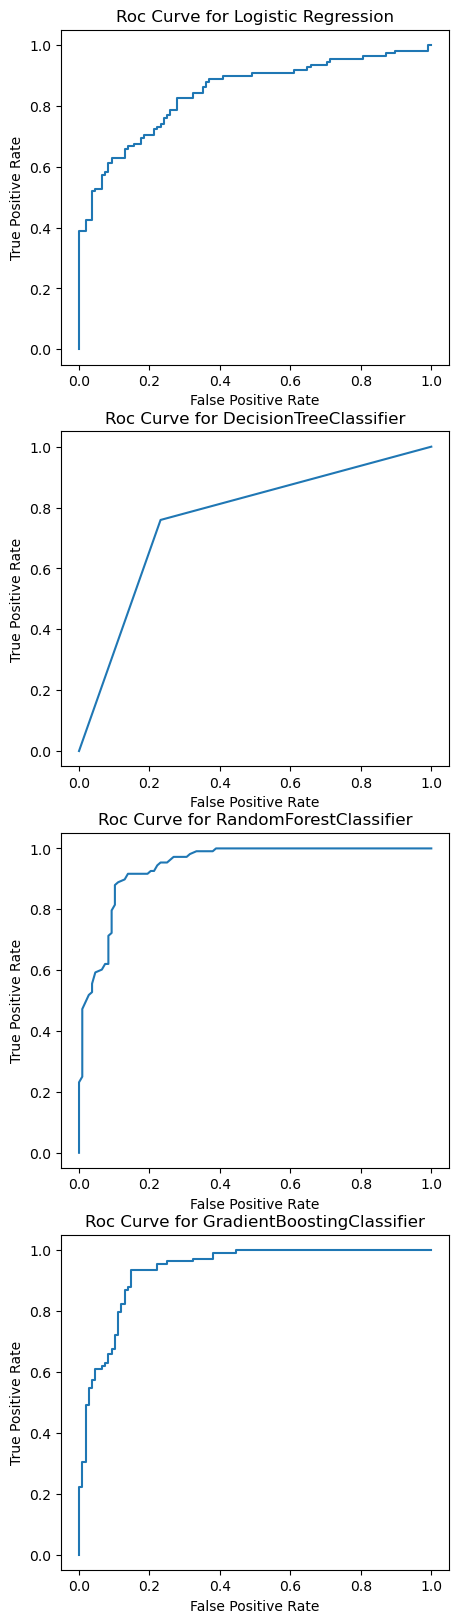

In [70]:
fig,axs=plt.subplots(nrows=len(models.keys()),figsize=(5,5*len(models.keys())))
metrics_default_b={list(models.keys())[i]:models[list(models.keys())[i]].metrics(plot_roc=True,ax=axs[i]) for i in range(len(models.keys()))}
metrics_default_b


We can see with default hyperparameters that with oversampling, metrics of models improve significantly, precisely precision, recall and f1-score increase (~0.8 and more for all models). Means that oversampling works and models don’t have a bias for majority class and can predict minority class frequently (that’s why precision, recall, f1-score increase). 

The best model with default hyperparameter is RandomForestClassifier (.94 for auc, .89 for recall etc..).The roc curve have a beautiful curve (concave curve) But to have a relevant conclusion, we need to find the best model with a grid search and cross validation. Because even if the metrics are high for the model, there is one test set and one training set and so even if the bias of the model is small but variance can be high and consequently, the predictions for the model can have a variability with the training set (overfitting). 

#### Let's try Undersampling to see what happening

In [71]:
# we use liblinear solver because Gradient descent doesn't converge for Logistic Regression
for model_name in models.keys():
    if model_name == "Logistic Regression":
        hyperparameters=copy.deepcopy(MODEL_HYPERPARAMETERS_DEF[model_name])
        hyperparameters["solver"]="liblinear"
    else:
        hyperparameters=None
    models[model_name]=ComputeModel(
        df_new_[relevant_quantitatives_qualitatives_features],df_new_[outcome],
        process=process,model_name=model_name,
        hyperparameters=hyperparameters,positive_mod=positive_mod
    )
    models[model_name].fit(sampling=True,method="RandomUnderSampling")

{'Logistic Regression': {'auc': 0.7846260387811634,
  'accuracy': 0.7719298245614035,
  'precision': 0.8048780487804879,
  'recall': 0.868421052631579,
  'f1_score': 0.8354430379746836},
 'DecisionTreeClassifier': {'auc': 0.625,
  'accuracy': 0.6403508771929824,
  'precision': 0.7611940298507462,
  'recall': 0.6710526315789473,
  'f1_score': 0.7132867132867132},
 'RandomForestClassifier': {'auc': 0.7749307479224377,
  'accuracy': 0.7017543859649122,
  'precision': 0.7386363636363636,
  'recall': 0.8552631578947368,
  'f1_score': 0.7926829268292682},
 'GradientBoostingClassifier': {'auc': 0.770775623268698,
  'accuracy': 0.7456140350877193,
  'precision': 0.7831325301204819,
  'recall': 0.8552631578947368,
  'f1_score': 0.8176100628930818}}

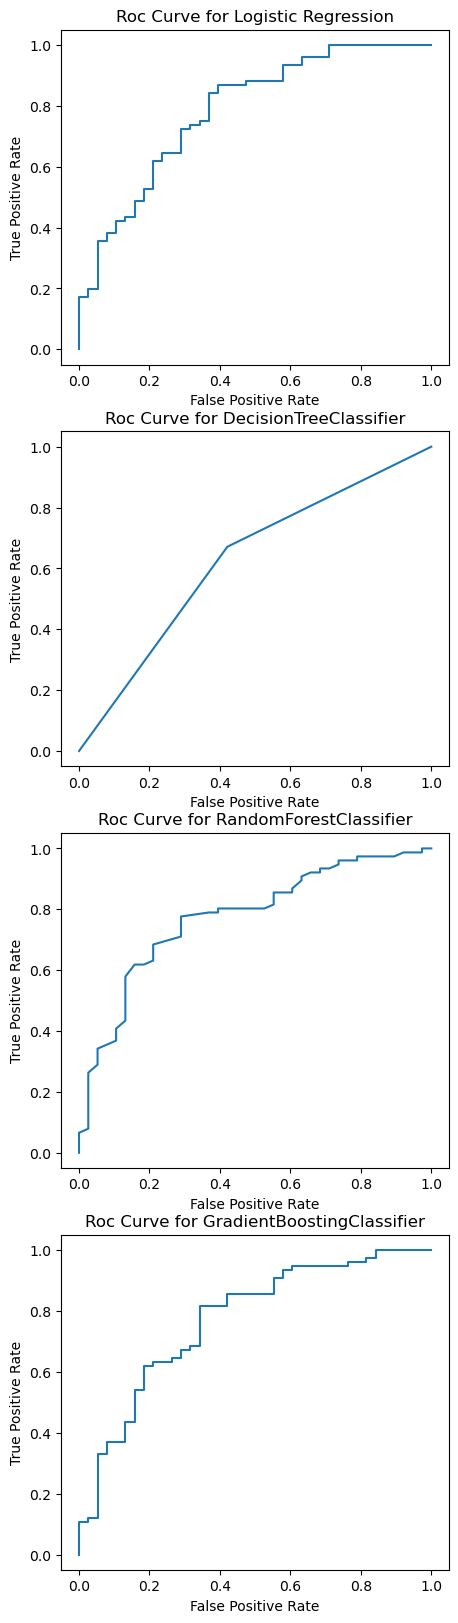

In [72]:
fig,axs=plt.subplots(nrows=len(models.keys()),figsize=(5,5*len(models.keys())))
metrics_default_bunder={list(models.keys())[i]:models[list(models.keys())[i]].metrics(plot_roc=True,ax=axs[i]) for i in range(len(models.keys()))}
metrics_default_bunder

With undersampling, we can see that all models (exception for LogisticRegression are not good, the metrics are small comparing to situation with oversampling. 

I think that as the proportion of minority class (fraud) is very small comparing to proportion of non fraud rows, models underfit the data, the dataset with undersampling don't have lot of informations to learn how to recognize majority class/ minority class. 

So we have this hypothesis: as the proportion of fraud rows is very small, underfitting implies underfit of the datas and overfitting implies overfit of the datas.


The best models seems to be in this situation LogisticRegression

#### Let's see what happen with ```Parameters Tuning```  and ```Resampling```

In [75]:
params_grid= \
    {
        "Logistic Regression": \
            {
                "penalty": ["l2"],
                "C": np.logspace(-3, 3, 7),
                "solver": ["liblinear"],
                "multi_class": ["auto"],
                "n_jobs": [None],
                "max_iter": [200,250]
            },
        "DecisionTreeClassifier":
            {
                "criterion": ["gini"],
                "splitter": ["best"],
                "max_depth": [None],
                "min_samples_split": [2, 3, 4],
                "min_samples_leaf": [1],
                "min_weight_fraction_leaf": [0.],
                "max_features": [None],
                "random_state": [None],
                "max_leaf_nodes": [None]+list(range(2, 100)),
                "min_impurity_decrease": [0.],
                "class_weight": [None],
                "ccp_alpha": [0.]
            },
        "RandomForestClassifier":
            {
                "n_estimators":list(np.random.randint(50,500,size=5)),
                "max_depth":list(np.random.randint(1,20,size=5))
            },
        "GradientBoostingClassifier":
            {
                "learning_rate":[0.15,0.1,0.05,0.01,0.005,0.001],
                "n_estimators":[100,250,500,750,1000,1250,1500,1750]
            }

    }


In [76]:
#we used 3 fold cross validation with a params default grid located in globals file (in src directory)
for model_name in models.keys():
    models[model_name]=ComputeModel(df_X=df_new_[relevant_quantitatives_qualitatives_features],
                                    y=df_new_[outcome],
                                    process=process,
                                    model_name=model_name,
                                    positive_mod=positive_mod,
                                    grid_search=True,
                                    cv=3,
                                    params_grid=params_grid[model_name], # => grid search
                                    stratify=False)
    models[model_name].fit(sampling=True,
                           method="SMOTE") # => Resampling

Fitting 3 folds for each of 14 candidates, totalling 42 fits
Fitting 3 folds for each of 297 candidates, totalling 891 fits
Fitting 3 folds for each of 25 candidates, totalling 75 fits
Fitting 3 folds for each of 48 candidates, totalling 144 fits


{'Logistic Regression': {'auc': 0.8998195721281897,
  'accuracy': 0.8148148148148148,
  'precision': 0.9010989010989011,
  'recall': 0.7256637168141593,
  'f1_score': 0.803921568627451},
 'DecisionTreeClassifier': {'auc': 0.8152762264799381,
  'accuracy': 0.7916666666666666,
  'precision': 0.8469387755102041,
  'recall': 0.7345132743362832,
  'f1_score': 0.7867298578199051},
 'RandomForestClassifier': {'auc': 0.9608213764069079,
  'accuracy': 0.8611111111111112,
  'precision': 0.9191919191919192,
  'recall': 0.8053097345132744,
  'f1_score': 0.8584905660377359},
 'GradientBoostingClassifier': {'auc': 0.9377953432425467,
  'accuracy': 0.8333333333333334,
  'precision': 0.8969072164948454,
  'recall': 0.7699115044247787,
  'f1_score': 0.8285714285714286}}

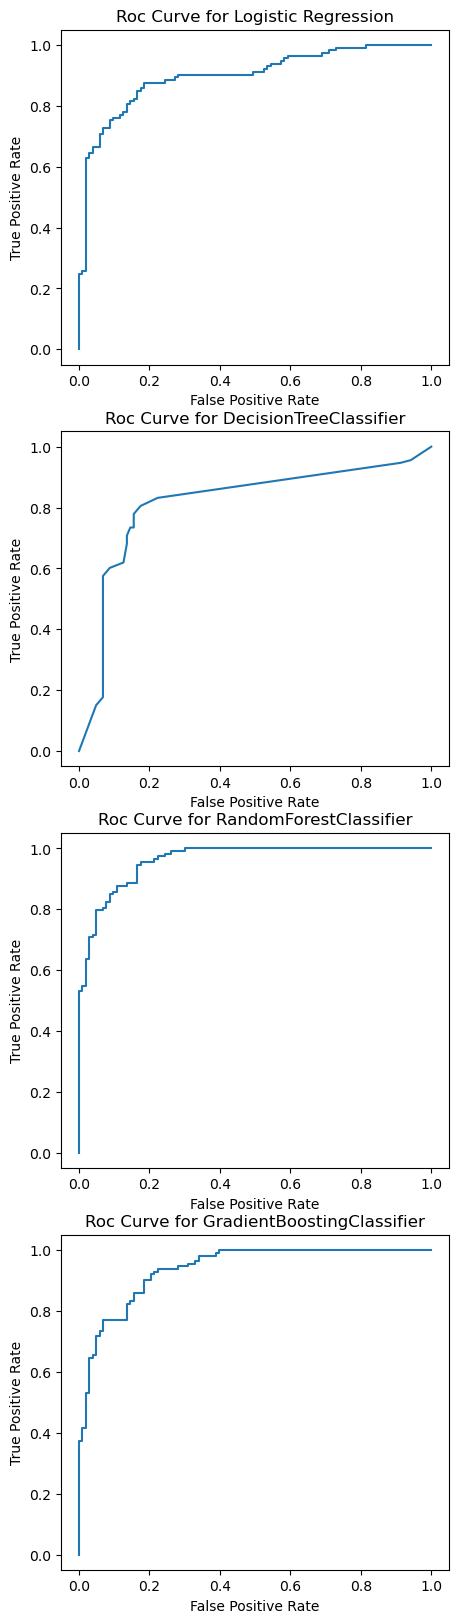

In [77]:
fig, axs=plt.subplots(nrows=len(models.keys()),figsize=(5,5*len(models.keys())))
metrics_b={list(models.keys())[i]:models[list(models.keys())[i]].metrics(plot_roc=True,ax=axs[i]) for i in range(len(models.keys()))}
metrics_b

**Training with undersampling**
A training of the models was very long, we use cv=3 to be able to train the models (even if more cv is high, 
more it is better).

Same conclusion that before without cross validation results of models (precisely Decision Trees) have a very high values 
for all metrics. 

But ```RandomForestClassifier``` seems to be the best of all model with ```auc (~0.96)``` and beautiful 
auc curve and best **recall**

#### Let's see what happen with ```Parameters Tuning```  and ```Undersampling```


In [78]:
{key:model.model.hyperparameters for key,model in zip(models.keys(),models.values())}

{'Logistic Regression': {'C': 10.0,
  'max_iter': 200,
  'multi_class': 'auto',
  'n_jobs': None,
  'penalty': 'l2',
  'solver': 'liblinear'},
 'DecisionTreeClassifier': {'ccp_alpha': 0.0,
  'class_weight': None,
  'criterion': 'gini',
  'max_depth': None,
  'max_features': None,
  'max_leaf_nodes': 46,
  'min_impurity_decrease': 0.0,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'min_weight_fraction_leaf': 0.0,
  'random_state': None,
  'splitter': 'best'},
 'RandomForestClassifier': {'max_depth': 11, 'n_estimators': 294},
 'GradientBoostingClassifier': {'learning_rate': 0.05, 'n_estimators': 500}}

In [79]:
#we used 3 fold cross validation with a params default grid located in globals file (in src directory)
for model_name in models.keys():
    models[model_name]=ComputeModel(df_X=df_new_[relevant_quantitatives_qualitatives_features],
                                    y=df_new_[outcome],
                                    process=process,
                                    model_name=model_name,
                                    positive_mod=positive_mod,
                                    grid_search=True,
                                    cv=3,
                                    params_grid=params_grid[model_name],
                                    stratify=False)
    models[model_name].fit(sampling=True,method="RandomUnderSampling")

Fitting 3 folds for each of 14 candidates, totalling 42 fits
Fitting 3 folds for each of 297 candidates, totalling 891 fits
Fitting 3 folds for each of 25 candidates, totalling 75 fits
Fitting 3 folds for each of 48 candidates, totalling 144 fits


{'Logistic Regression': {'auc': 0.7834948212495824,
  'accuracy': 0.7105263157894737,
  'precision': 0.7702702702702703,
  'recall': 0.7808219178082192,
  'f1_score': 0.7755102040816327},
 'DecisionTreeClassifier': {'auc': 0.7069829602405613,
  'accuracy': 0.6403508771929824,
  'precision': 0.6403508771929824,
  'recall': 1.0,
  'f1_score': 0.7807486631016043},
 'RandomForestClassifier': {'auc': 0.8506515202138323,
  'accuracy': 0.7456140350877193,
  'precision': 0.7391304347826086,
  'recall': 0.9315068493150684,
  'f1_score': 0.8242424242424241},
 'GradientBoostingClassifier': {'auc': 0.8172402271967925,
  'accuracy': 0.7456140350877193,
  'precision': 0.7340425531914894,
  'recall': 0.9452054794520548,
  'f1_score': 0.8263473053892215}}

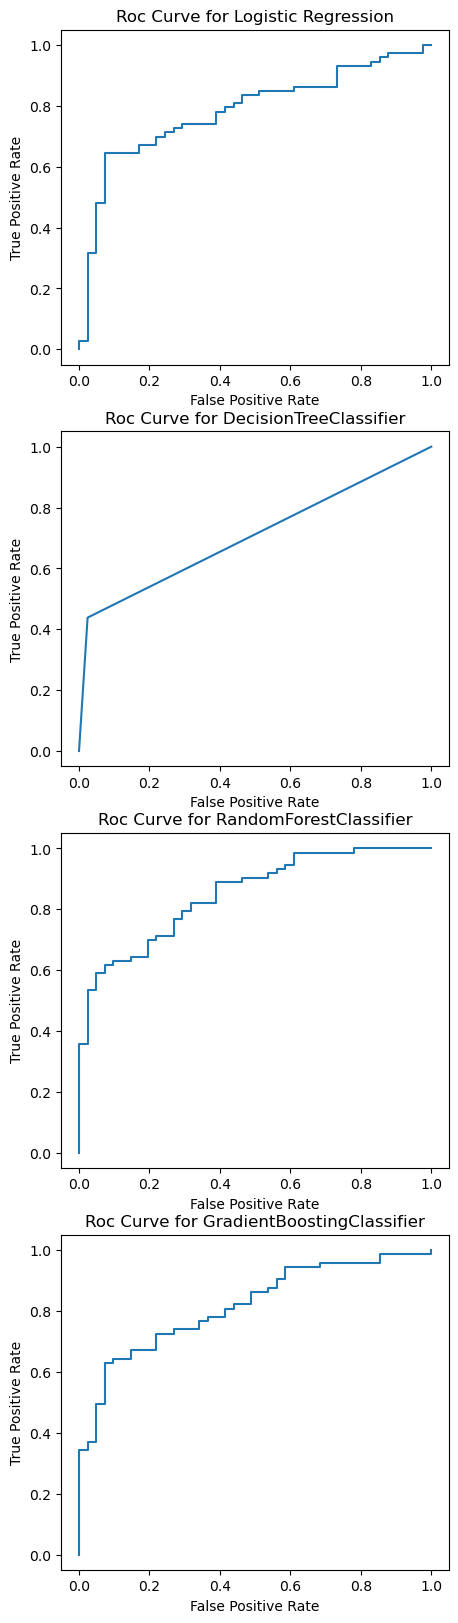

In [80]:
fig, axs= plt.subplots(nrows=len(models.keys()),figsize=(5,5*len(models.keys())))
metrics_bunder={list(models.keys())[i]:models[list(models.keys())[i]].metrics(plot_roc=True,ax=axs[i]) for i in range(len(models.keys()))}
metrics_bunder

**grid search with undersampling**:

recall and f1-score for all models are slightly smaller than recall f1-score with oversampling, 
implies that false negative rate are more important with undersampling. 
In our case implies with the fact that the positive modality is the minority class, models have a bias 
for the majority class even if we have done a undersampling.
Only ```GradientBoostingClassifier``` have a best recall (~0.94).

best model for this approach: ```GradientBoostingClassifier```

In [81]:
{key:model.model.hyperparameters for key,model in zip(models.keys(),models.values())}

{'Logistic Regression': {'C': 1.0,
  'max_iter': 200,
  'multi_class': 'auto',
  'n_jobs': None,
  'penalty': 'l2',
  'solver': 'liblinear'},
 'DecisionTreeClassifier': {'ccp_alpha': 0.0,
  'class_weight': None,
  'criterion': 'gini',
  'max_depth': None,
  'max_features': None,
  'max_leaf_nodes': 2,
  'min_impurity_decrease': 0.0,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'min_weight_fraction_leaf': 0.0,
  'random_state': None,
  'splitter': 'best'},
 'RandomForestClassifier': {'max_depth': 15, 'n_estimators': 294},
 'GradientBoostingClassifier': {'learning_rate': 0.01, 'n_estimators': 250}}

In [82]:
hyperparams_opti={
    "GradientBoostingClassifier":
        {
            "learning_rate":0.01,
            "n_estimators":250
        },
    "RandomForestClassifier":
        {

            "max_depth": 15,
            "n_estimators": 294
        }
}

# To conclude, this 2 models are the best for this dataset, we choose the model with a model with fewer parameters to reduce variance of the model.
# RandomForestClassifier have as well good auc (0.85) than "GradientBoostingClassifier", we choose it to simplify the model.

In [83]:
from src.core.ComputeModel import ComputeModel
best_models={
    "RandomForestClassifier":
        ComputeModel(df_X=df_new_[relevant_quantitatives_qualitatives_features],
                     y=df_new_[outcome],
                     process=process,
                     model_name="RandomForestClassifier",
                     positive_mod=positive_mod,
                     grid_search=False,
                     params_grid=hyperparams_opti["RandomForestClassifier"],
                     stratify=False)
}

In [87]:
p=.40
best_models["RandomForestClassifier"].fit(sampling=True,method="SMOTE",perc_minority=p)
while best_models["RandomForestClassifier"].metrics()["f1_score"] < .901:
    best_models["RandomForestClassifier"].fit(sampling=True, method="SMOTE",perc_minority=p)
    p+=.01

In [88]:
("Percentage of minority class: " + 
 str(round((p/(p+1))*100,2)) 
 + "%") # 46.24% percentage of minority class with oversampling for f1_score >=0.901

'Percentage of minority class: 46.24%'

{'auc': 0.9471399387129724,
 'accuracy': 0.8894472361809045,
 'precision': 0.8793103448275862,
 'recall': 0.9272727272727272,
 'f1_score': 0.902654867256637}

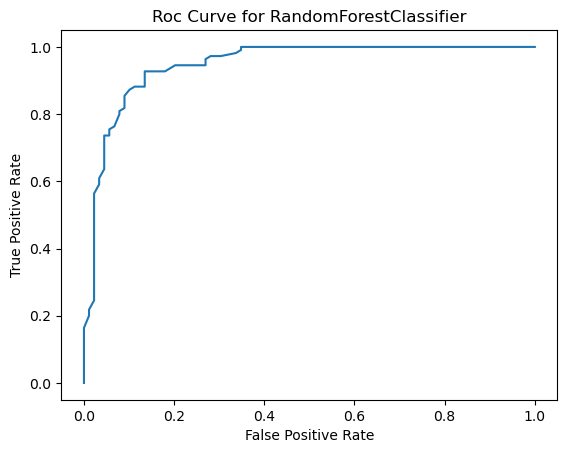

In [89]:
fig,ax=plt.subplots()
best_models["RandomForestClassifier"].metrics(plot_roc=True,ax=ax)

In [91]:
bias_two, variance = best_models["RandomForestClassifier"].bias_variance_estimate(bootstrap_rounds=100)

In [92]:
print(f"Finally: Bias²: {bias_two} and Variance: {variance}")

Finally: Bias²: 0.125 and Variance: 0.06703703703703702


In [93]:
"(0.125, 0.06703703703703702)"

'(0.125, 0.06703703703703702)'